### Imports

In [1893]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg


from datetime import date
from datetime import timedelta

import plotly.express as px
import plotly.graph_objs as go 

### Dataset

In [1894]:
forex = "EURUSD=X"

In [1895]:
# set the start and end date for the historical data
start_date = '2004-01-01'
end_date = date.today().strftime("%Y-%m-%d")

In [1896]:
yf.pdr_override() # <== that's all it takes :-)

In [1897]:
# download dataframe
df = pdr.get_data_yahoo(forex, start=start_date, end=end_date, interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194       0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194       0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698       0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103       0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095       0

In [1898]:
# save the data to a CSV file
path = "data/" + forex + ".csv"
df.to_csv(path, index=True)

In [1899]:
df = pd.read_csv("data/EURUSD=X.csv", index_col = "Date")
df.head()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194       0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194       0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698       0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103       0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095       0

In [1900]:
df.tail()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2023-04-19  1.097538  1.098660  1.091834  1.097538   1.097538       0
2023-04-20  1.095218  1.098901  1.093434  1.095218   1.095218       0
2023-04-21  1.097093  1.099251  1.093972  1.097093   1.097093       0
2023-04-24  1.099227  1.103424  1.096876  1.099227   1.099227       0
2023-04-25  1.105950  1.106807  1.096924  1.105950   1.105950       0

In [1901]:
df.describe()

Open         High          Low        Close    Adj Close  Volume
count  5010.000000  5010.000000  5010.000000  5010.000000  5010.000000  5010.0
mean      1.242199     1.246858     1.237090     1.242211     1.242211     0.0
std       0.125898     0.126593     0.126340     0.125892     0.125892     0.0
min       0.959619     0.967006     0.072902     0.959619     0.959619     0.0
25%       1.132387     1.136018     1.128873     1.132416     1.132416     0.0
50%       1.230792     1.235063     1.225896     1.230800     1.230800     0.0
75%       1.334165     1.338245     1.328564     1.334072     1.334072     0.0
max       1.598184     1.602821     1.587402     1.598798     1.598798     0.0

In [1902]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Basic Visualization

In [1903]:
columns = ["Open", "High", "Low", "Close", "Adj Close"]
for col in columns:
    title = "Line chart of " + col
    fig = px.line(df, x = df.index, y = col, title = title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [1904]:
for col in columns:
    title = "Area chart of " + col
    fig = px.area(df, x = df.index, y = col, title = title)
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

In [1905]:
# for col in columns:
#     title = "Histogram of " + col
#     fig = px.histogram(df, x=df.index, y=col, title = title)
#     fig.update_traces(xbins_size="M12")
#     fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M12", tickformat="%b\n%Y")
#     fig.update_layout(bargap=0.5)
#     fig.show()

In [1906]:
# result = seasonal_decompose(df['Open'], model = 'additive', period = 12)
# result.seasonal.plot()
# result.trend.plot()
# result.plot()

In [1907]:
# result = seasonal_decompose(df['Close'], model = 'additive', period = 12)
# result.seasonal.plot()
# result.trend.plot()
# result.plot()

[1.         0.99696971 0.99516641 0.99353664 0.99185162 0.99014062
 0.98843897 0.98688061 0.98505097 0.98304396 0.98124726 0.97944799
 0.9775797  0.97567364 0.97388986 0.97205836 0.9701194  0.96823578
 0.96626804 0.96441022 0.96240839 0.96050932 0.9587861  0.9570524
 0.9549765  0.95302128 0.95117883 0.94934629 0.94743653 0.94552189
 0.94344031 0.941456   0.93972758 0.93783942 0.93588989 0.9340723
 0.93224874]


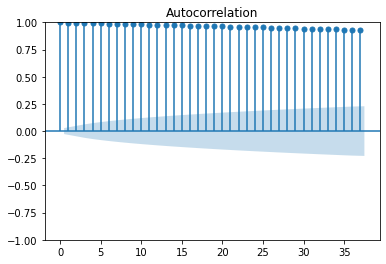

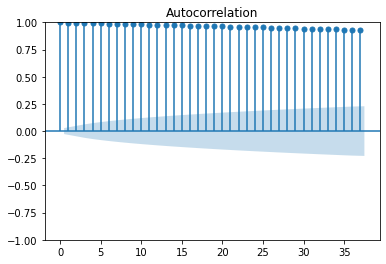

In [1908]:
acf_values = acf(df['Close'])
print(acf_values)
plot_acf(df['Close'])

[ 1.00000000e+00  9.97168748e-01  2.15461403e-01  8.04277389e-02
  1.49617013e-02 -1.83297884e-03 -9.22242743e-04  2.56501093e-02
 -3.90099711e-02 -5.20530685e-02  1.32115719e-02  6.40138686e-03
 -8.37182421e-03 -1.19212177e-02  1.41484977e-02 -1.17102228e-03
 -1.61098885e-02 -5.15955609e-04 -1.96073396e-02  1.35121886e-02
 -1.90777415e-02  7.65188368e-03  3.41734754e-02  1.80396327e-02
 -5.72184933e-02 -5.89901463e-03  1.64263803e-02  1.25653586e-02
 -7.62036955e-03 -1.23248084e-02 -4.10813198e-02  7.98138409e-03
  5.60232413e-02 -1.22359058e-02 -2.02951923e-02  1.89792975e-02
  7.09489880e-03]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



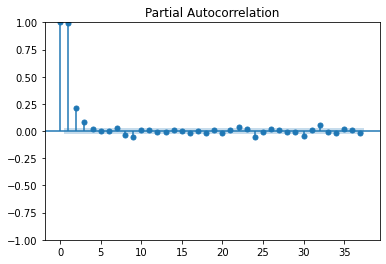

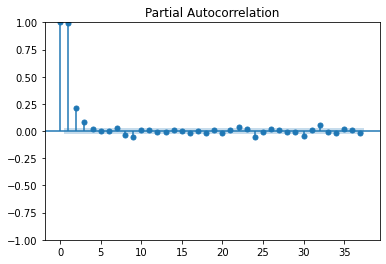

In [1909]:
pacf_values = pacf(df['Close'])
print(pacf_values)
plot_pacf(df['Close'])

[1.         0.99700207 0.99515638 0.99341387 0.99171076 0.99006615
 0.98843584 0.98673918 0.98508648 0.98309199 0.98117294 0.97933876
 0.97747713 0.97567052 0.97380549 0.97194458 0.97017377 0.96820624
 0.9662182  0.96429064 0.96248437 0.96043948 0.95873804 0.95694794
 0.95493341 0.9529949  0.95120035 0.94946361 0.94746324 0.94550094
 0.94358694 0.94169902 0.93973438 0.93790053 0.93611289 0.93421111
 0.93233842]


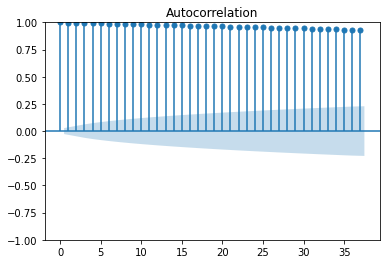

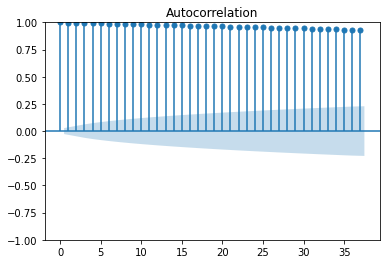

In [1910]:
acf_values = acf(df['Open'])
print(acf_values)
plot_acf(df['Open'])

[ 1.00000000e+00  9.97201115e-01  2.04606618e-01  6.24640141e-02
  2.43356441e-02  1.84492376e-02  9.45989446e-03 -9.13556267e-03
  3.62997302e-03 -6.30160716e-02 -1.44231208e-02  9.17414200e-03
 -2.12635511e-03  7.82063112e-03 -8.07654650e-03 -1.53859248e-03
  1.56054237e-02 -2.72704958e-02 -1.78337976e-02  1.15240800e-03
  2.38778065e-02 -3.67973473e-02  4.88335550e-02  5.50762380e-03
 -4.28719760e-02 -7.36043654e-04  2.75247346e-02  2.04234714e-02
 -4.65825714e-02 -8.52342733e-03  3.89334178e-04  5.72570156e-03
 -8.36511879e-03  1.71291656e-02  1.58462883e-02 -1.78642848e-02
  1.20195119e-03]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



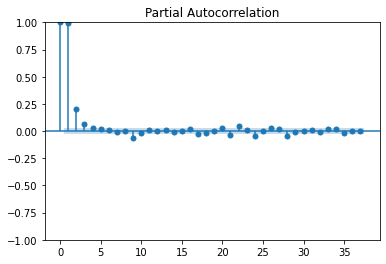

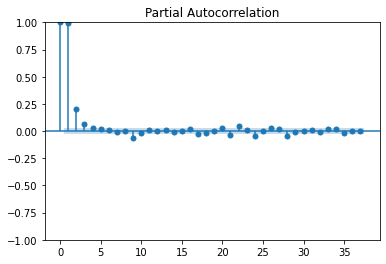

In [1911]:
pacf_values = pacf(df['Open'])
print(pacf_values)
plot_pacf(df['Open'])

### Preprocessing (Close)

In [1912]:
def adf(col):
    adf = adfuller(df.loc[:, col].values, autolag = 'AIC')
    print("ADF Statistic:", adf[0])
    print("p-value:", adf[1])
    print("n_lags:", adf[2])
    for key, value in adf[4].items():
        print("Critical values:", key, value)
    if(adf[1]<0.05):
        print("Stationary data")
    else:
        print("Non-stationary data") 

In [1913]:
adf('Close')

ADF Statistic: -1.894861261923031
p-value: 0.3344823835917268
n_lags: 31
Critical values: 1% -3.431664318047896
Critical values: 5% -2.862120785889549
Critical values: 10% -2.5670791531303423
Non-stationary data


In [1914]:
adf('Open')

ADF Statistic: -1.9541973775432147
p-value: 0.30700974046810997
n_lags: 27
Critical values: 1% -3.4316632622500816
Critical values: 5% -2.8621203194445384
Critical values: 10% -2.5670789048233216
Non-stationary data


<AxesSubplot:xlabel='Date'>

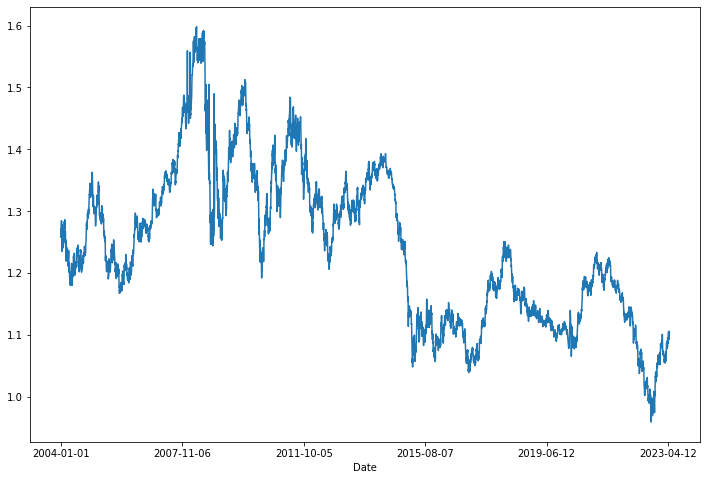

In [1915]:
df['Open'].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

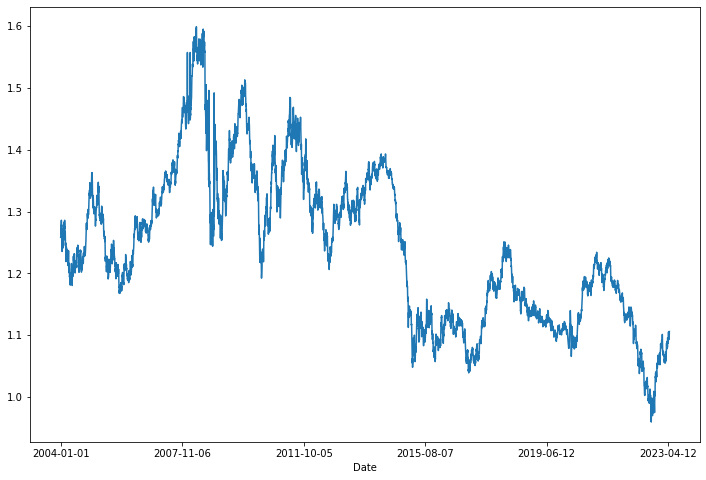

In [1916]:
df['Close'].plot(figsize=(12,8))

In [1917]:
df["Close_diff1"] = df["Close"].diff(periods=100)
df["Close_diff2"] = df["Close"].diff(periods=200)
df["Close_diff3"] = df["Close"].diff(periods=300)

df["Open_diff1"] = df["Open"].diff(periods=100)
df["Open_diff2"] = df["Open"].diff(periods=200)
df["Open_diff3"] = df["Open"].diff(periods=300)

In [1918]:
# df = df.dropna()

In [1919]:
# results = adfuller(df["Close_diff1"].dropna())
# results

<AxesSubplot:xlabel='Date'>

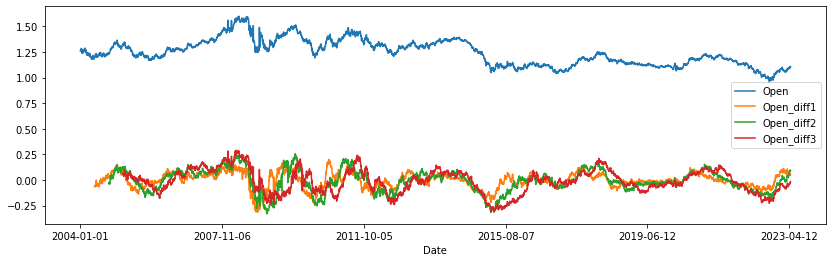

In [1920]:
df.plot(y = ["Open", "Open_diff1", "Open_diff2", "Open_diff3"],figsize=(14, 4))

<AxesSubplot:xlabel='Date'>

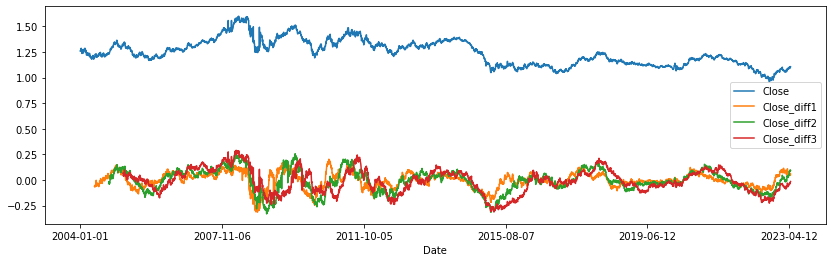

In [1921]:
df.plot(y = ["Close", "Close_diff1", "Close_diff2", "Close_diff3"],figsize=(14, 4))

In [1922]:
df = df.dropna()
print("--------------OPEN---------------")
print(adf('Open_diff1'))
print(adf('Open_diff2'))
print(adf('Open_diff3'))
print("--------------CLOSE---------------")
print(adf('Close_diff1'))
print(adf('Close_diff2'))
print(adf('Close_diff3'))

--------------OPEN---------------
ADF Statistic: -4.870090458164974
p-value: 3.986360500743675e-05
n_lags: 25
Critical values: 1% -3.4317468589474043
Critical values: 5% -2.8621572514417712
Critical values: 10% -2.567098565264968
Stationary data
None
ADF Statistic: -3.662147191641327
p-value: 0.00467821276234223
n_lags: 8
Critical values: 1% -3.4317418047913173
Critical values: 5% -2.862155018606945
Critical values: 10% -2.567097376628896
Stationary data
None
ADF Statistic: -3.4183388296289734
p-value: 0.010349364241758715
n_lags: 27
Critical values: 1% -3.4317474559682983
Critical values: 5% -2.8621575151945633
Critical values: 10% -2.567098705672209
Stationary data
None
--------------CLOSE---------------
ADF Statistic: -4.5852423708624
p-value: 0.00013750616955678037
n_lags: 31
Critical values: 1% -3.4317486515424056
Critical values: 5% -2.8621580433769385
Critical values: 10% -2.567098986847004
Stationary data
None
ADF Statistic: -3.653912808181686
p-value: 0.004810145937958152
n_la

In [1923]:
# change filter value for open
df_close = df.filter(['Close', 'Close_diff1'])

# change df_close to open for open
# also ctrl+f and change close to open everywhere for open
close_dataset = df_close.values

train_close_len = math.ceil(len(close_dataset) * 0.8)
test_close_len = len(close_dataset) - train_close_len
print("Training length is: ", train_close_len)
print("Testing length is: ", test_close_len)

Training length is:  3768
Testing length is:  942


In [1924]:
# # Creating the training/testing data

train_data_close = pd.DataFrame(df_close['Close'][0:math.ceil(len(close_dataset)*0.80)])
test_data_close = pd.DataFrame(df_close['Close'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

stationary_train_data_close = pd.DataFrame(df_close['Close_diff1'][0:math.ceil(len(close_dataset)*0.80)])
stationary_test_data_close = pd.DataFrame(df_close['Close_diff1'][math.ceil(len(close_dataset)*0.80) : int(len(df))])

print("Training length is: ", train_data_close.shape)
print("Testing length is: ", test_data_close.shape)


Training length is:  (3768, 1)
Testing length is:  (942, 1)


In [1925]:
stationary_test_data_close

Close_diff1
Date                   
2019-09-16    -0.005345
2019-09-17    -0.014432
2019-09-18    -0.011050
2019-09-19    -0.018460
2019-09-20    -0.015234
...                 ...
2023-04-19     0.065088
2023-04-20     0.052683
2023-04-21     0.044251
2023-04-24     0.044809
2023-04-25     0.056258

[942 rows x 1 columns]

In [1926]:
# Scaling training data

scaler = MinMaxScaler(feature_range=(0,1))
train_scaled_close_data = scaler.fit_transform(train_data_close)
# stationary_train_scaled_close_data = scaler.fit_transform(stationary_train_data_close)
train_scaled_close_data

array([[0.51015828],
       [0.50496611],
       [0.49691057],
       ...,
       [0.11788474],
       [0.11129677],
       [0.11930375]])

In [1927]:
scaler = MinMaxScaler(feature_range=(0,1))
test_scaled_close_data = scaler.fit_transform(test_data_close)
# stationary_test_scaled_close_data = scaler.fit_transform(stationary_test_data_close)
test_scaled_close_data

array([[0.54180551],
       [0.51358658],
       [0.53863041],
       [0.52287476],
       [0.52909121],
       [0.51835814],
       [0.50913423],
       [0.51756165],
       [0.49426323],
       [0.48327958],
       [0.49055135],
       [0.47486519],
       [0.48771803],
       [0.49820008],
       [0.50245266],
       [0.50653804],
       [0.50126791],
       [0.49688722],
       [0.50697797],
       [0.51544057],
       [0.52235188],
       [0.52198838],
       [0.52407254],
       [0.53871987],
       [0.55775529],
       [0.56815656],
       [0.56670646],
       [0.55852225],
       [0.55965053],
       [0.54929313],
       [0.54211864],
       [0.54754206],
       [0.55324995],
       [0.56770316],
       [0.56865513],
       [0.5721047 ],
       [0.55825168],
       [0.53845192],
       [0.5370674 ],
       [0.518597  ],
       [0.51959717],
       [0.52433832],
       [0.51592654],
       [0.51623576],
       [0.51888884],
       [0.53149414],
       [0.53778181],
       [0.540

### Models

#### Some functions

In [1928]:
# Metrics
def metrics(test, predictions):
    mse = mean_squared_error(test, predictions, squared = True)
    rmse = math.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)

In [1929]:
def pred_plot(test, pred):
    plt.plot(test)
    plt.plot(pred, color='red')
    plt.show()

#### Auto Regressive

In [1930]:
ar_model = AutoReg(train_scaled_close_data, lags = test_data_close.shape[0])
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [ 2.82428382e-05  8.58660119e-01  1.15803015e-01  6.02426809e-03
 -1.38962832e-02  4.80454681e-03  2.00200186e-02  5.99819008e-02
 -3.17684244e-02 -2.41556556e-02  3.07665665e-02 -4.46415229e-02
 -1.39344998e-02  3.31372145e-02 -5.03442624e-03 -1.41681398e-02
  6.27171942e-04  4.74397504e-02 -2.49857402e-02 -5.36949101e-03
 -5.49837293e-03 -5.00371662e-03 -1.47030455e-02  7.19795917e-02
 -3.64205980e-02 -5.64898204e-02  2.66280238e-02  2.08763686e-02
  8.90567486e-03  2.34712711e-02 -8.70461732e-02  5.38943635e-02
  3.37262426e-03 -9.50391783e-03 -3.88185477e-02  8.39229747e-02
 -6.16135144e-02  5.62646268e-02 -5.01880868e-02  7.08133868e-03
  1.10801371e-02 -5.09146867e-02 -3.87832084e-02  2.35633637e-01
 -1.89482754e-01  1.03509732e-02  1.93817272e-02 -4.41650697e-02
  8.12584344e-02 -4.74468728e-02  3.39496910e-02 -1.75436008e-02
 -2.83087304e-02  5.96872694e-03  3.58389375e-02  2.28335617e-02
 -2.23507428e-02 -4.12283508e-02  4.37850133e-02  3.28575878e-02
 -5.4758588

In [1931]:
predictions = ar_model_fit.predict(start=len(train_scaled_close_data), end=len(train_scaled_close_data)+len(test_scaled_close_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_scaled_close_data[i]))

predicted=0.116675, expected=0.541806
predicted=0.122943, expected=0.513587
predicted=0.119503, expected=0.538630
predicted=0.124354, expected=0.522875
predicted=0.121615, expected=0.529091
predicted=0.122178, expected=0.518358
predicted=0.109947, expected=0.509134
predicted=0.112701, expected=0.517562
predicted=0.101766, expected=0.494263
predicted=0.111315, expected=0.483280
predicted=0.110198, expected=0.490551
predicted=0.101043, expected=0.474865
predicted=0.103383, expected=0.487718
predicted=0.105971, expected=0.498200
predicted=0.107835, expected=0.502453
predicted=0.111332, expected=0.506538
predicted=0.103122, expected=0.501268
predicted=0.105087, expected=0.496887
predicted=0.096479, expected=0.506978
predicted=0.100636, expected=0.515441
predicted=0.098144, expected=0.522352
predicted=0.098070, expected=0.521988
predicted=0.095293, expected=0.524073
predicted=0.087765, expected=0.538720
predicted=0.086585, expected=0.557755
predicted=0.087347, expected=0.568157
predicted=0.

In [1932]:
metrics(test_scaled_close_data, predictions)

MSE: 0.29043447703108205
RMSE: 0.5389197315288076
MAE: 0.49047374649803066


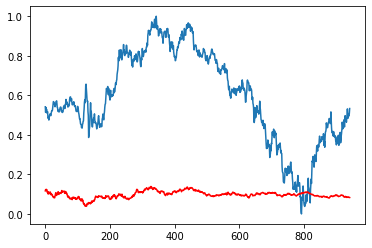

In [1933]:
pred_plot(test_scaled_close_data, predictions)

In [1934]:
ar_model = AutoReg(train_scaled_close_data, lags = 30)
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [ 9.18009728e-04  7.38489466e-01  1.70606179e-01  7.17068894e-02
  1.91015978e-02 -4.24314063e-03 -6.95720505e-04  7.00782085e-02
 -2.05155488e-02 -6.34459127e-02  1.79634021e-02  1.83917444e-02
 -1.06618147e-02 -2.32382227e-02  1.91051644e-02  1.12584839e-02
 -1.81476866e-02  1.94116573e-02 -3.08140457e-02  3.10454754e-02
 -3.41936894e-02 -2.06357060e-02  2.60013611e-02  6.61682756e-02
 -6.49036214e-02 -2.26009048e-02  1.38398416e-02  2.45387449e-02
  1.64796901e-02  2.64463478e-02 -4.89927039e-02]


In [1935]:
predictions = ar_model_fit.predict(start=len(train_scaled_close_data), end=len(train_scaled_close_data)+len(test_scaled_close_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_scaled_close_data[i]))

predicted=0.120134, expected=0.541806
predicted=0.119540, expected=0.513587
predicted=0.119706, expected=0.538630
predicted=0.120495, expected=0.522875
predicted=0.122034, expected=0.529091
predicted=0.121551, expected=0.518358
predicted=0.121266, expected=0.509134
predicted=0.122137, expected=0.517562
predicted=0.123120, expected=0.494263
predicted=0.122503, expected=0.483280
predicted=0.123365, expected=0.490551
predicted=0.124773, expected=0.474865
predicted=0.125199, expected=0.487718
predicted=0.124920, expected=0.498200
predicted=0.125634, expected=0.502453
predicted=0.126288, expected=0.506538
predicted=0.127680, expected=0.501268
predicted=0.127214, expected=0.496887
predicted=0.127116, expected=0.506978
predicted=0.127426, expected=0.515441
predicted=0.127626, expected=0.522352
predicted=0.127909, expected=0.521988
predicted=0.129477, expected=0.524073
predicted=0.129947, expected=0.538720
predicted=0.130029, expected=0.557755
predicted=0.130510, expected=0.568157
predicted=0.

In [1936]:
metrics(test_scaled_close_data, predictions)

MSE: 0.17256606827735702
RMSE: 0.41541072239093324
MAE: 0.3619459230992867


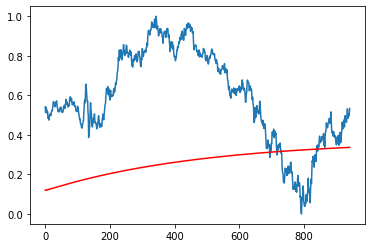

In [1937]:
pred_plot(test_scaled_close_data, predictions)

In [1939]:
stationary_train_data_close = stationary_train_data_close.to_numpy()
stationary_test_data_close = stationary_test_data_close.to_numpy()

In [1941]:
ar_model = AutoReg(stationary_train_data_close, lags = 942)
ar_model_fit = ar_model.fit()
print('Coefficients: %s' % ar_model_fit.params)

Coefficients: [-1.97552762e-04  8.24449621e-01  1.59106938e-01  2.94310176e-03
 -6.32012752e-03 -9.88697805e-03  2.72817653e-02  5.03452799e-02
 -3.07529546e-02 -2.16546531e-02  2.33222749e-02 -3.37168406e-02
 -2.00736924e-02  2.39948274e-02  1.74822206e-02 -2.38056987e-02
  1.43959031e-03  5.19965950e-02 -4.06537517e-02  1.50482246e-02
 -2.31879781e-02 -6.90962939e-03 -1.35515025e-02  7.13712731e-02
 -3.88002411e-02 -4.77085526e-02  3.13137480e-02  2.36465289e-02
  6.72310849e-03  1.44681169e-02 -7.81114792e-02  4.57308781e-02
  1.95670367e-02 -2.64123516e-02 -4.15680070e-02  7.02724408e-02
 -3.19171614e-02  4.68903000e-02 -5.14797232e-02  1.06273068e-03
  1.32370648e-02 -4.15079135e-02 -3.96783678e-02  2.38537876e-01
 -1.88720481e-01  6.20720468e-04  1.04098539e-02 -2.47850802e-02
  6.79392811e-02 -3.95110209e-02  3.13330422e-02 -2.36070767e-02
 -2.03334322e-02  2.42782047e-03  2.70708662e-02  2.51592474e-02
 -1.77380225e-02 -3.90407725e-02  4.85141634e-02  3.31264495e-02
 -5.1280443

In [1942]:
predictions = ar_model_fit.predict(start=len(stationary_train_data_close), end=len(stationary_train_data_close)+len(stationary_test_data_close)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], stationary_test_data_close[i]))

predicted=-0.007007, expected=-0.005345
predicted=-0.002408, expected=-0.014432
predicted=-0.005983, expected=-0.011050
predicted=-0.010480, expected=-0.018460
predicted=-0.012150, expected=-0.015234
predicted=-0.012508, expected=-0.015452
predicted=-0.020044, expected=-0.019209
predicted=-0.019610, expected=-0.018499
predicted=-0.023971, expected=-0.023816
predicted=-0.018702, expected=-0.027558
predicted=-0.022281, expected=-0.027937
predicted=-0.032178, expected=-0.033680
predicted=-0.032852, expected=-0.029761
predicted=-0.027170, expected=-0.024077
predicted=-0.025497, expected=-0.023186
predicted=-0.021183, expected=-0.018696
predicted=-0.025260, expected=-0.019319
predicted=-0.019659, expected=-0.020846
predicted=-0.024696, expected=-0.016768
predicted=-0.031200, expected=-0.017352
predicted=-0.033645, expected=-0.017963
predicted=-0.031501, expected=-0.016482
predicted=-0.028689, expected=-0.013596
predicted=-0.027579, expected=-0.006241
predicted=-0.022407, expected=-0.000396


In [1943]:
metrics(stationary_test_data_close, predictions)

MSE: 0.002895074608648163
RMSE: 0.05380589752664817
MAE: 0.043638847267790284


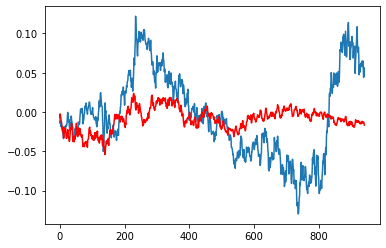

In [1944]:
pred_plot(stationary_test_data_close, predictions)

#### Moving Average

In [1945]:
df_ma = df_close.copy()

df_ma['MA50'] = df_ma['Close'].rolling(50).mean()
df_ma['MA100'] = df_ma['Close'].rolling(100).mean()
df_ma['MA200'] = df_ma['Close'].rolling(200).mean()

In [1946]:
from plotly.offline import iplot 

fig = go.Figure(data=[go.Scatter(x=df_ma.index,
                                 y=df_ma["Close"], 
                                 line = dict(color = "blue"), name="Close"), 
                      go.Scatter(x=df_ma.index,
                                 y=df_ma["MA50"], 
                                 line=dict(color='orange', width=2), name="MA50"),
                      go.Scatter(x=df_ma.index,
                                 y=df_ma["MA100"], 
                                 line=dict(color='green', width=2), name="MA100"),
                     go.Scatter(x=df_ma.index,
                                 y=df_ma["MA200"], 
                                 line=dict(color='magenta', width=2), name="MA200")])

fig.update_layout(
    plot_bgcolor = "white",
    title_text="Close Price and its moving average for Europe Exchange"
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black",
                title_text="<b>Close and Moving Average</b>")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black", 
                 title_text="<b>Date</b>")



iplot(fig)

In [1947]:
df_ma_copy = df_ma.copy()

df_ma_copy.dropna(inplace = True)

In [1948]:
metrics(df_ma_copy['Close'], df_ma_copy['MA50'])

MSE: 0.0008980884419911689
RMSE: 0.029968123764946796
MAE: 0.02186378162786136


In [1949]:
metrics(df_ma_copy['Close'], df_ma_copy['MA100'])

MSE: 0.0018530421307435209
RMSE: 0.04304697586060513
MAE: 0.03176556484764258


In [1950]:
metrics(df_ma_copy['Close'], df_ma_copy['MA200'])

MSE: 0.0039390664455859325
RMSE: 0.06276198248610326
MAE: 0.04917358336606435
